## 1- Importing Libraries

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 2- Example 1

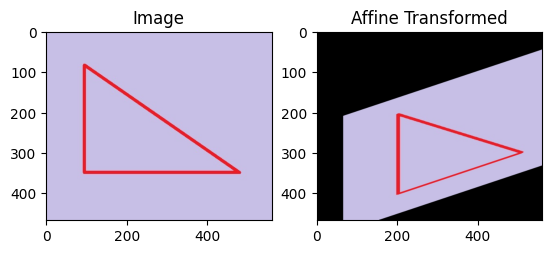

In [13]:
image = plt.imread("images/triangle.jpg")
rows,cols,ch = image.shape

pts1 = np.float32([[100,350],[100,90],[490,350]])
pts2 = np.float32([[200,400],[500,300],[200,200]])

M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(image,M,(cols,rows))

plt.subplot(121),plt.imshow(image),plt.title('Image')
plt.subplot(122),plt.imshow(dst),plt.title('Affine Transformed')
plt.show()

## 3- Example 2

### Choosing Three arbitrary points on the clock

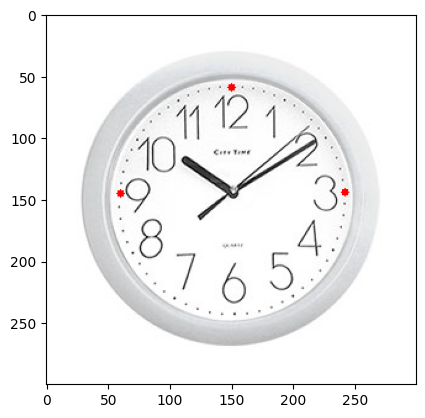

In [17]:
image = plt.imread("images/clock.jpg")

writable_image = image.copy()

cv2.circle(writable_image, (60, 145), 3, (0, 0, 255), -1)
cv2.circle(writable_image, (242, 144), 3, (0, 0, 255), -1)
cv2.circle(writable_image, (150, 59), 3, (0, 0, 255), -1)

plt.imshow(writable_image[..., ::-1])
plt.show()


In [18]:
# image = plt.imread("images/clock.jpg")

# cv2.circle(image, (60, 145),3, (0,0,255),-1)
# cv2.circle(image, (242, 144),3, (0,0,255),-1)
# cv2.circle(image, (150, 59),3, (0,0,255),-1)

# plt.imshow(image[...,::-1])

### Intractive Program (The Clock)

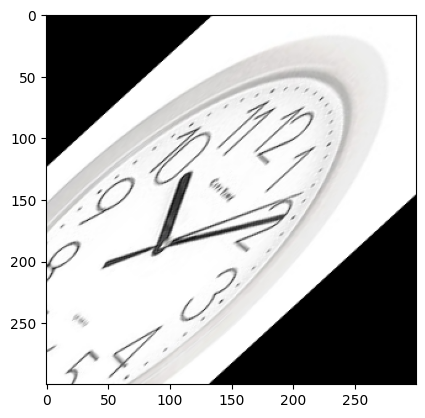

In [9]:
image = plt.imread("images/clock.jpg")
rows,cols,ch = image.shape

pts1 = np.float32([[60,145],[242,144],[150,59]])
pts2 = []

# mouse callback function
def click(event,x,y,flags,param):
    global pts2
    if event == cv2.EVENT_LBUTTONDOWN:
        pts2.append([x, y])
        cv2.circle(result,(x,y),3,(0,0,200),-1)
        cv2.imshow('AffineTransform', result)
        if len(pts2)==3:
            pts2 = np.float32(pts2)
            M = cv2.getAffineTransform(pts1,pts2)
            dst = cv2.warpAffine(image,M,(cols,rows))
            cv2.imshow("AffineTransform", dst)
            plt.imshow(dst)
            
# Create a black image, a window and bind the function to window
result = np.zeros_like(image, np.uint8)

cv2.namedWindow('AffineTransform')
cv2.setMouseCallback('AffineTransform',click)
cv2.imshow('AffineTransform', result)

while True:
    cv2.imshow('image',image)
    if cv2.waitKey(1) & 0xFF == 27:
        break
    
cv2.destroyAllWindows()